<a href="https://colab.research.google.com/github/Mrcyoga10004/Deep-Learning/blob/main/Tugas_week_1_Classification_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [4]:
# Memuat dataset
file_path = "/content/income.csv"
df = pd.read_csv(file_path)

In [5]:
# Membersihkan kolom target
if 'income' in df.columns:
    df['income'] = df['income'].str.replace('.', '', regex=False)
    df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [6]:
# Mengenkripsi variabel kategorikal
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [7]:
# Mendefinisikan fitur dan target
X = df.drop(columns=['income'])
y = df['income']

In [8]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
# Menormalisasi fitur numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Mengonversi data ke dalam bentuk tensor PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)


# Membuat DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [11]:
# Mendefinisikan model PyTorch
class IncomeClassifier(nn.Module):
    def __init__(self, input_size):
        super(IncomeClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x



In [12]:
# Inisialisasi model, fungsi loss, dan optimizer
input_size = X_train.shape[1]
model = IncomeClassifier(input_size)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Melatih model PyTorch
epochs = 10
for epoch in range(epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()


# Mengevaluasi model PyTorch
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        predicted = (outputs > 0.5).float()
        y_pred.extend(predicted.numpy())
        y_true.extend(batch_y.numpy())

In [13]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_pred)


# Mendefinisikan model TensorFlow
tf_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_size,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Mengompilasi model TensorFlow
tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Melatih model TensorFlow
tf_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8034 - loss: 0.4077 - val_accuracy: 0.8484 - val_loss: 0.3263
Epoch 2/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8524 - loss: 0.3199 - val_accuracy: 0.8507 - val_loss: 0.3217
Epoch 3/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8493 - loss: 0.3239 - val_accuracy: 0.8487 - val_loss: 0.3223
Epoch 4/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8523 - loss: 0.3164 - val_accuracy: 0.8514 - val_loss: 0.3199
Epoch 5/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8536 - loss: 0.3124 - val_accuracy: 0.8514 - val_loss: 0.3191
Epoch 6/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8549 - loss: 0.3148 - val_accuracy: 0.8503 - val_loss: 0.3184
Epoch 7/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8567 - loss: 0.3073 - val_accuracy: 0.8533 - val_loss: 0.3176
Epoch 8/10
1222/1222 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8532 - loss: 0.3097 -

In [15]:
# Mengevaluasi model TensorFlow
y_pred_tf = (tf_model.predict(X_test) > 0.5).astype('int32')
accuracy_tf = accuracy_score(y_test, y_pred_tf)
precision_tf = precision_score(y_test, y_pred_tf)
recall_tf = recall_score(y_test, y_pred_tf)
f1_tf = f1_score(y_test, y_pred_tf)
auc_tf = roc_auc_score(y_test, y_pred_tf)

306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [16]:
# Menampilkan hasil evaluasi
print("Model PyTorch:")
print(f"Akurasi: {accuracy}, Presisi: {precision}, Recall: {recall}, F1 Score: {f1}, AUC: {auc}")
print("\nModel TensorFlow:")
print(f"Akurasi: {accuracy_tf}, Presisi: {precision_tf}, Recall: {recall_tf}, F1 Score: {f1_tf}, AUC: {auc_tf}")

Model PyTorch:
Akurasi: 0.8532091309243526, Presisi: 0.7371458551941238, Recall: 0.6009409751924722, F1 Score: 0.6621112158341188, AUC: 0.7667603543705599

Model TensorFlow:
Akurasi: 0.8549493295117208, Presisi: 0.7638968481375358, Recall: 0.5701454234388366, F1 Score: 0.6529512613274553, AUC: 0.7573510053541915


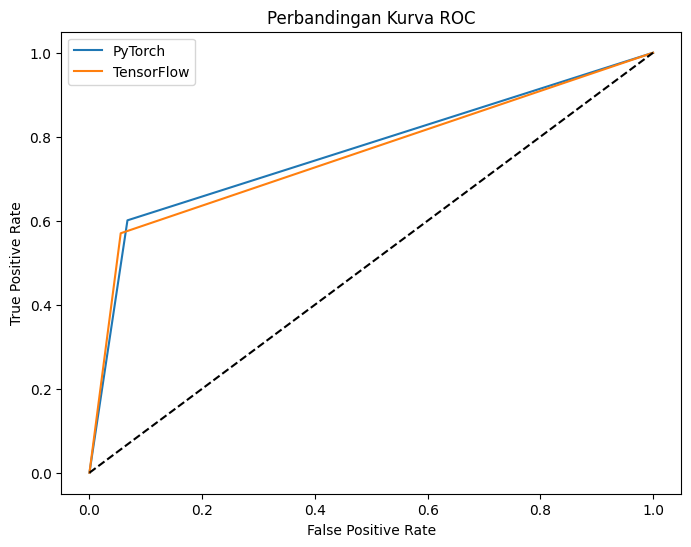

In [17]:
# Membuat kurva ROC
def plot_roc(y_test, y_pred_proba, label):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=label)

plt.figure(figsize=(8, 6))
plot_roc(y_true, y_pred, "PyTorch")
plot_roc(y_test, y_pred_tf, "TensorFlow")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Perbandingan Kurva ROC")
plt.legend()
plt.show()

Dalam evaluasi model klasifikasi, terdapat beberapa metrik utama seperti Akurasi, Presisi, Recall, F1 Score, dan AUC-ROC. Setiap metrik memiliki keunggulan tergantung pada kondisi dataset dan tujuan model. Akurasi mengukur persentase prediksi yang benar dari total data, tetapi kurang efektif jika dataset tidak seimbang. Presisi menilai seberapa banyak prediksi positif yang benar, berguna ketika false positive harus diminimalkan, seperti dalam diagnosis penyakit. Recall mengukur kemampuan model dalam mendeteksi semua kasus positif, penting saat false negative lebih berbahaya, misalnya dalam pendeteksian kanker. Untuk menyeimbangkan presisi dan recall, digunakan F1 Score, yang lebih cocok jika dataset tidak seimbang. Sementara itu, AUC-ROC memberikan gambaran lebih luas tentang kemampuan model dalam membedakan kelas positif dan negatif, cocok untuk model yang menghasilkan probabilitas. Pemilihan metrik terbaik bergantung pada konteks masalah. Jika data seimbang, akurasi cukup digunakan. Namun, jika terdapat ketimpangan data, F1 Score atau AUC-ROC lebih tepat. Oleh karena itu, penting untuk memilih metrik yang sesuai dengan tujuan model agar hasil evaluasi lebih akurat.

Skor F1 adalah metrik yang berguna yang menyeimbangkan presisi dan perolehan kembali tetapi tidak boleh digunakan secara terpisah karena tidak memperhitungkan negatif yang sebenarnya. Akurasi adalah metrik yang sederhana tetapi harus digunakan dengan hati-hati, terutama untuk kelas yang tidak seimbang. Kurva ROC dan AUC adalah metrik komprehensif yang mengevaluasi kinerja model di berbagai ambang batas dan sangat berguna untuk kelas yang tidak seimbang. Terakhir, PR-AUC adalah metrik yang mengukur kinerja keseluruhan model klasifikasi biner dengan memplot presisi terhadap perolehan kembali pada pengaturan ambang batas yang berbeda, memberikan penilaian kinerja yang lebih akurat untuk kelas yang tidak seimbang.

Kesimpulannya, mengetahui dan memilih metrik kinerja klasifikasi yang tepat penting untuk proyek Anda, karena metrik ini akan menentukan apakah proyek Anda akan gagal atau berhasil. Analisis ini tidak mudah; analisis ini melibatkan pemahaman kumpulan data Anda, pertimbangan yang dapat Anda terima, dan implikasi prediksi. Terima kasih telah membaca!